### Problem Statement

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


Data Description:
    
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


In [4]:
# Importing the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the data set

df = pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df = df.drop('Unnamed: 0', axis = 1)

In [7]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [8]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [14]:
# Applying feature scaling

scalar = StandardScaler()
df_scaled = scalar.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [15]:
neig = NearestNeighbors(n_neighbors = 2)
nbr = neig.fit(df_scaled)
distances, indices = nbr.kneighbors()

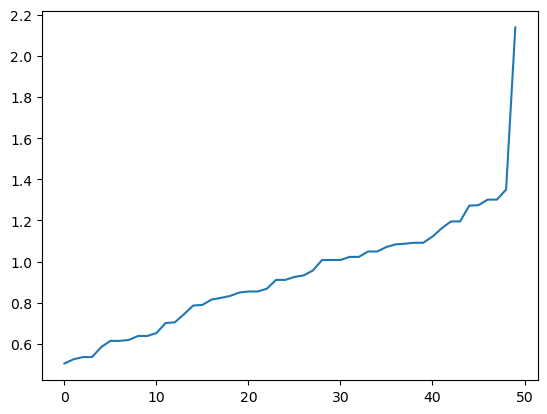

In [16]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)

In [17]:
dbscan = DBSCAN(eps = 1, min_samples = 3)
cluster_labels = dbscan.fit_predict(df_scaled)
cluster_labels

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [19]:
df1 = df.copy()
df1['labels'] = cluster_labels
df1.head()

,Murder,Assault,UrbanPop,Rape,labels
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


<AxesSubplot:xlabel='labels', ylabel='count'>

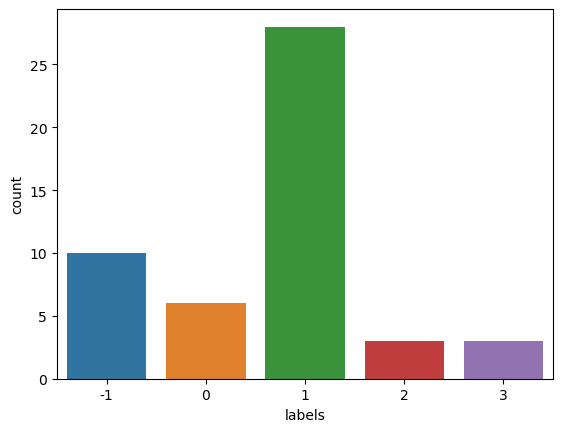

In [20]:
sns.countplot(x="labels", data= df1)

In [22]:
# Using normalized data

from sklearn.preprocessing import Normalizer

In [23]:
norm = Normalizer()
df_scaled = norm.fit_transform(df)

In [30]:
dbscan_norm= DBSCAN(eps = 0.035, min_samples = 4)
clust_label_norm= dbscan_norm.fit_predict(df_scaled)
clust_label_norm = pd.DataFrame({'clust_label_norm': clust_label_norm})

<AxesSubplot:xlabel='clust_label_norm', ylabel='count'>

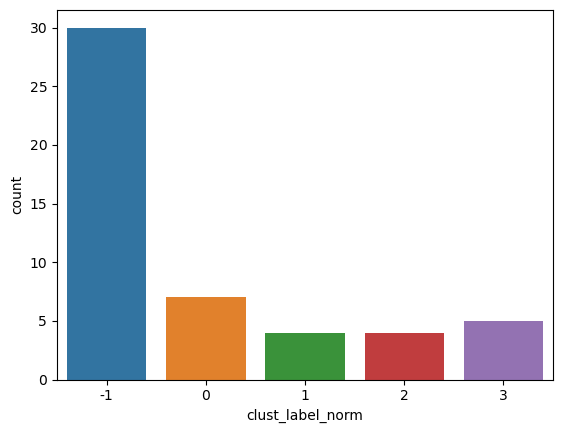

In [31]:
sns.countplot(x = 'clust_label_norm', data = clust_label_norm)